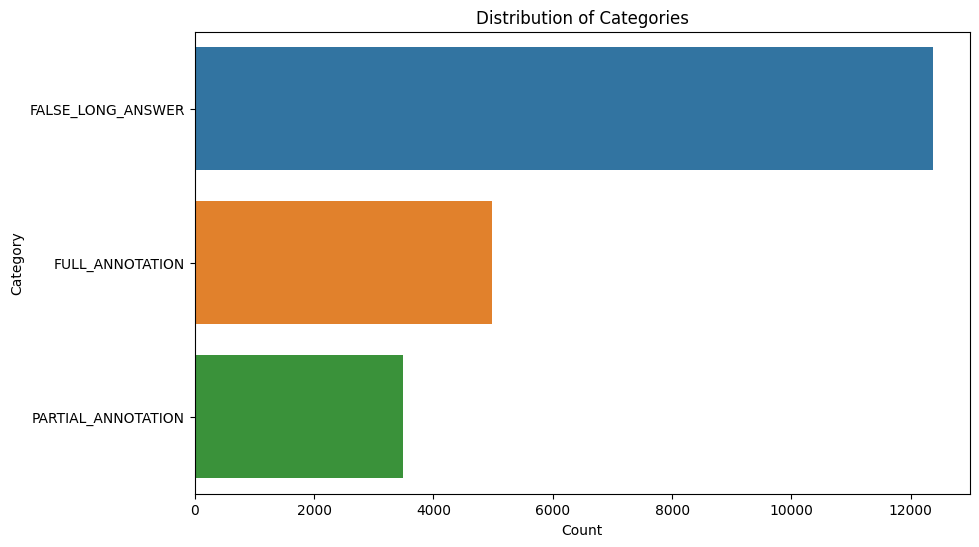

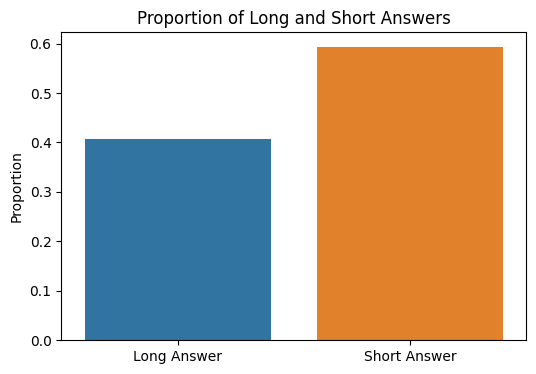

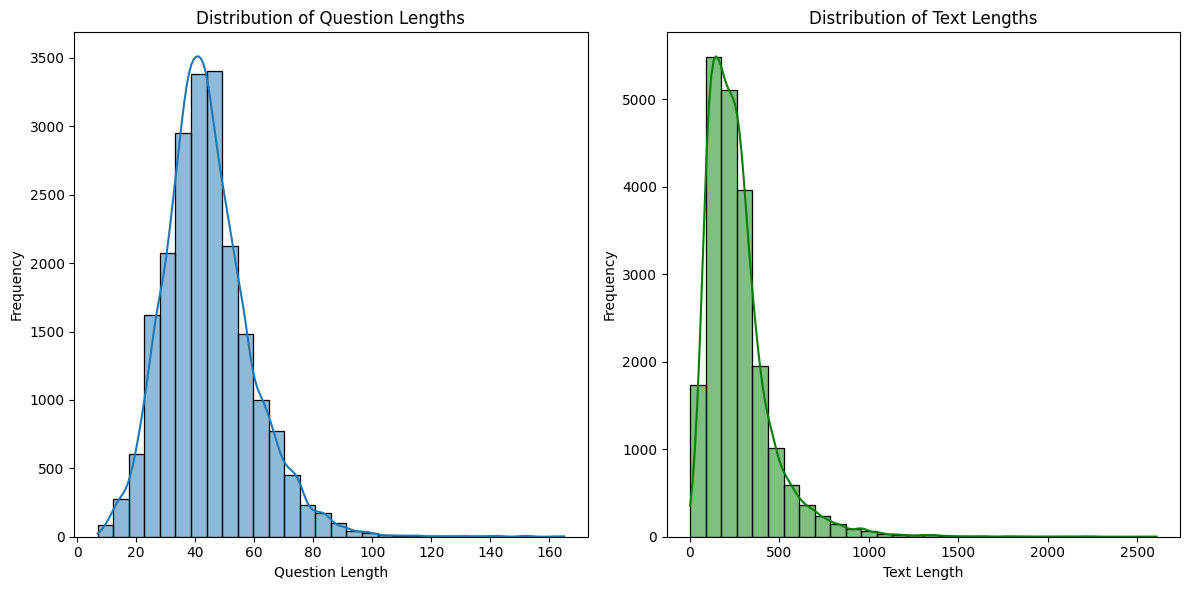

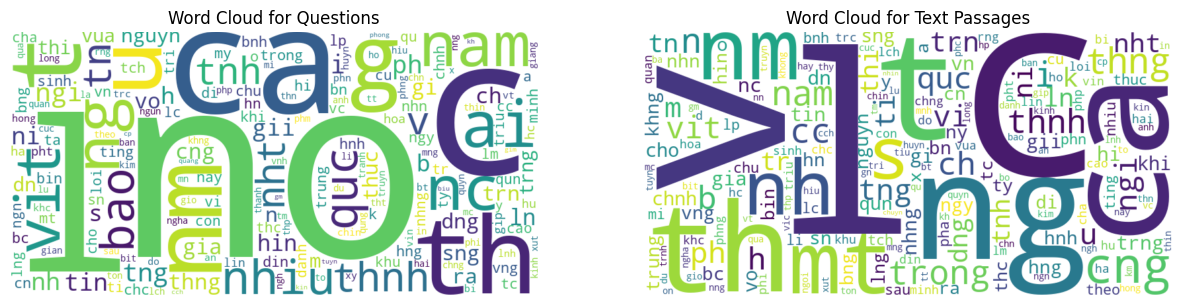

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

# Reading the JSON file
file_path_json = r"C:\Users\FPTSHOP\Downloads\zac2022_train_merged_final (2).json"  # Replace with your actual file path
with open(file_path_json, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Converting the JSON data to a DataFrame
df = pd.json_normalize(data)
first_entry = df['data'][0]
df_first_entry = pd.DataFrame(first_entry)

# Basic Statistics
total_entries = len(df_first_entry)
category_distribution = df_first_entry['category'].value_counts()
long_answer_proportion = df_first_entry['is_long_answer'].mean()

# Text Length Analysis
df_first_entry['question_length'] = df_first_entry['question'].apply(len)
df_first_entry['text_length'] = df_first_entry['text'].apply(len)
question_length_stats = df_first_entry['question_length'].describe()
text_length_stats = df_first_entry['text_length'].describe()

# Word Frequency Analysis
def clean_and_tokenize(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    tokens = text.split()
    return tokens

question_tokens = df_first_entry['question'].apply(clean_and_tokenize).sum()
text_tokens = df_first_entry['text'].apply(clean_and_tokenize).sum()
question_word_freq = Counter(question_tokens)
text_word_freq = Counter(text_tokens)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.values, y=category_distribution.index)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of Categories')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x=['Long Answer', 'Short Answer'], y=[long_answer_proportion, 1-long_answer_proportion])
plt.ylabel('Proportion')
plt.title('Proportion of Long and Short Answers')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_first_entry['question_length'], kde=True, bins=30)
plt.title('Distribution of Question Lengths')
plt.xlabel('Question Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_first_entry['text_length'], kde=True, bins=30, color='green')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



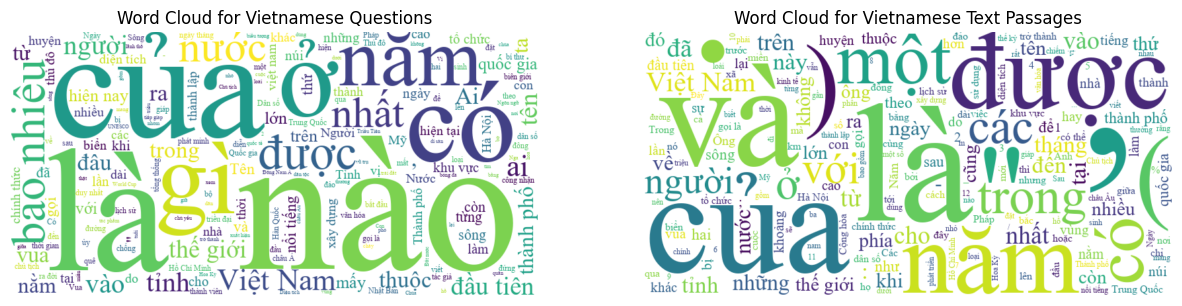

In [3]:
# Creating word clouds for Vietnamese text
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
question_wordcloud_vn = WordCloud(width=800, height=400, background_color='white', font_path=r"C:\Users\FPTSHOP\Downloads\Times New Roman 400.ttf").generate_from_frequencies(question_word_freq_vn)
plt.imshow(question_wordcloud_vn, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Vietnamese Questions')

plt.subplot(1, 2, 2)
text_wordcloud_vn = WordCloud(width=800, height=400, background_color='white', font_path=r"C:\Users\FPTSHOP\Downloads\Times New Roman 400.ttf").generate_from_frequencies(text_word_freq_vn)
plt.imshow(text_wordcloud_vn, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Vietnamese Text Passages')

plt.show()